In [1]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [2]:
#This next snippet of code loads in the diabetes data. There are 442 data points, each with 10 predictor variables (which we'll denote x) and one response variable (which we'll denote y).
data = np.genfromtxt('diabetes-data.csv', delimiter=',')
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
x = data[:,0:10] # predictors
y = data[:,10] # response variable

In [16]:

print (data)

[[ 59.       2.      32.1    ...   4.8598  87.     151.    ]
 [ 48.       1.      21.6    ...   3.8918  69.      75.    ]
 [ 72.       2.      30.5    ...   4.6728  85.     141.    ]
 ...
 [ 60.       2.      24.9    ...   4.1271  95.     132.    ]
 [ 36.       1.      30.     ...   5.1299  85.     220.    ]
 [ 36.       1.      19.6    ...   4.5951  92.      57.    ]]


In [17]:
print (features)

['age', 'sex', 'body mass index', 'blood pressure', 'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']


In [19]:
#Predict y without using x
#If we want to predict y without knowledge of x, what value would be predict? The mean value of y.
#In this case, the mean squared error (MSE) associated with the prediction is simply the variance of y
print ("Prediction: "), np.mean(y)
print ("Mean squared error: "), np.var(y)

Prediction: 
Mean squared error: 


(None, 5929.884896910383)

In [22]:
 #Predict y using a single feature of x
 #To fit a linear regression model, we could directly use the formula we saw in lecture. To make things even easier, this is already implemented in sklearn.linear_model.LinearRegression().   
#Here we define a function, one_feature_regression, that takes x and y, along with the index f of a single feature and fits a linear regressor to (x[f],y). It then plots the data along with the resulting line.
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print ("Feature index is out of bounds")
        return
    regr = linear_model.LinearRegression()
    x1 = x[:,[f]]
    regr.fit(x1, y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print ("Mean squared error: "), mean_squared_error(y, y_pred)
    return regr

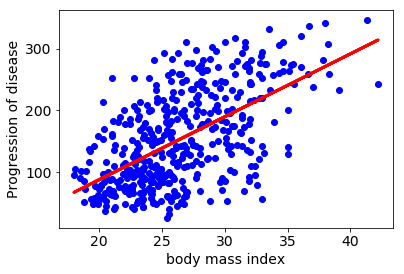

Mean squared error: 
w = 
b = 


(None, -117.77336656656527)

In [24]:
regr = one_feature_regression(x,y,2)
print ("w = "), regr.coef_
print ("b = "), regr.intercept_

In [26]:
print ("body mass index")

body mass index


In [30]:
#Predict y using a specified subset of features from x
#The function feature_subset_regression is just like one_feature_regression, but this time uses a list of features flist.
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print ("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print ("Feature index is out of bounds")
            return
    regr = linear_model.LinearRegression()
    regr.fit(x[:,flist], y)
    return regr

In [31]:
#Try using just features #2 (body mass index) and #8 (serum5).
flist = [2,8]
regr = feature_subset_regression(x,y,[2,8])
print ("w = "), regr.coef_
print ("b = "), regr.intercept_
print ("Mean squared error: "), mean_squared_error(y, regr.predict(x[:,flist]))

w = 
b = 
Mean squared error: 


(None, 3205.1900768248533)

In [32]:
#Finally, use all 10 features.
regr = feature_subset_regression(x,y,range(0,10))
print ("w = "), regr.coef_
print ("b = "), regr.intercept_
print ("Mean squared error: "), mean_squared_error(y, regr.predict(x))

w = 
b = 
Mean squared error: 


(None, 2859.6963475867506)

In [33]:
#4. Splitting the data into a training and test set¶
In the experiments above, every model was fit to the entire data set and its mean squared error was evaluated on this same data set. This methodology would not, in general, yield accurate estimates of future error. In this specific case, however, the discrepancy might not be too bad because the data set is quite large relative to the number of features.

To investigate this further, we define a procedure split_data that partitions the data set into separate training and test sets. It is invoked as follows:

trainx, trainy, testx, testy = split_data(n_train)
Here:

n_train is the desired number of training points
trainx and trainy are the training points and response values
testx and testy are the test points and response values
The split is done randomly, but the random seed is fixed, and thus the same split is produced if the procedure is called repeatedly with the same n_train parameter

SyntaxError: invalid syntax (<ipython-input-33-6b7baa69638b>, line 1)

In [35]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print ("Invalid number of training points")
        return
    np.random.seed(0)
    perm = np.random.permutation(442)
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,442)]
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

In [45]:
#n_train = 20
regr = feature_subset_regression(x,y,range(0,10))
print ("w = "), regr.coef_
print ("b = "), regr.intercept_

print (split_data(20))
print ("Mean squared error: "), mean_squared_error(y, regr.predict(x))


w = 
b = 
(array([[ 54.    ,   2.    ,  36.1   , 115.    , 163.    ,  98.4   ,
         43.    ,   4.    ,   4.6821, 101.    ],
       [ 45.    ,   1.    ,  32.    , 110.    , 224.    , 134.2   ,
         45.    ,   5.    ,   5.4116,  93.    ],
       [ 59.    ,   2.    ,  27.2   , 107.    , 158.    , 102.    ,
         39.    ,   4.    ,   4.4427,  93.    ],
       [ 45.    ,   1.    ,  24.2   ,  83.    , 177.    , 118.4   ,
         45.    ,   4.    ,   4.2195,  82.    ],
       [ 42.    ,   1.    ,  30.6   , 121.    , 176.    ,  92.8   ,
         69.    ,   3.    ,   4.2627,  89.    ],
       [ 43.    ,   1.    ,  35.4   ,  93.    , 185.    , 100.2   ,
         44.    ,   4.    ,   5.3181, 101.    ],
       [ 53.    ,   1.    ,  23.7   ,  92.    , 186.    , 109.2   ,
         62.    ,   3.    ,   4.3041,  81.    ],
       [ 65.    ,   2.    ,  28.5   , 109.    , 201.    , 123.    ,
         46.    ,   4.    ,   5.0752,  96.    ],
       [ 34.    ,   1.    ,  31.4   ,  87.    , 149. 

(None, 2859.6963475867506)

In [52]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print ("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print ("Feature index is out of bounds")
            return
        regr = linear_model.LinearRegression()
        regr.fit(x[:,flist], y)
    return regr
print ("Mean squared error: "), mean_squared_error(y, regr.predict(x))

Mean squared error: 


(None, 2859.6963475867506)

In [75]:
print (split_data(100))
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print ("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print ("Feature index is out of bounds")
            return
    regr = linear_model.LinearRegression()
    regr.fit(x[:,flist], y)
    return regr
regr = feature_subset_regression(x,y,range(0,10))
print ("w = "), regr.coef_
print ("b = "), regr.intercept_
print ("Mean squared error: "), mean_squared_error(y, regr.predict(x))
               

(array([[ 54.    ,   2.    ,  36.1   , 115.    , 163.    ,  98.4   ,
         43.    ,   4.    ,   4.6821, 101.    ],
       [ 45.    ,   1.    ,  32.    , 110.    , 224.    , 134.2   ,
         45.    ,   5.    ,   5.4116,  93.    ],
       [ 59.    ,   2.    ,  27.2   , 107.    , 158.    , 102.    ,
         39.    ,   4.    ,   4.4427,  93.    ],
       [ 45.    ,   1.    ,  24.2   ,  83.    , 177.    , 118.4   ,
         45.    ,   4.    ,   4.2195,  82.    ],
       [ 42.    ,   1.    ,  30.6   , 121.    , 176.    ,  92.8   ,
         69.    ,   3.    ,   4.2627,  89.    ],
       [ 43.    ,   1.    ,  35.4   ,  93.    , 185.    , 100.2   ,
         44.    ,   4.    ,   5.3181, 101.    ],
       [ 53.    ,   1.    ,  23.7   ,  92.    , 186.    , 109.2   ,
         62.    ,   3.    ,   4.3041,  81.    ],
       [ 65.    ,   2.    ,  28.5   , 109.    , 201.    , 123.    ,
         46.    ,   4.    ,   5.0752,  96.    ],
       [ 34.    ,   1.    ,  31.4   ,  87.    , 149.    ,  93.8

(None, 2859.6963475867506)